In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/Users/jacksonlipfert/Desktop/2007-2010_Bank_Data.csv')

/var/folders/17/1lp6v8rx7hg46v35nrbf4mk00000gn/T/ipykernel_26401/3450699339.py:1: DtypeWarning: Columns (1373,1380,1398,1399,1400,1401,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1434,1435,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1468,1469,1475,1650,1651,1652,1653,1654,1655,1693,2010,2011,2012,2013,2014,2015,2016,2017) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/jacksonlipfert/Desktop/2007-2010_Bank_Data.csv')


In [7]:
len(set(df['ENTITY SHORT NAME: RSSD9010']))

5780

In [12]:
# Determine Bank Health

df['ENTITY SHORT NAME: RSSD9010'][df['TIER 1 RISK-BASED CAPITAL RATIO: BHCK7206'].isna() == False]

df['non_performing_loan_ratio'] = (df['TOTAL LOANS AND LEASE FINANCE RECEIVABLES: NONACCRUAL: BHCK1403'] + df['TOTAL LOANS AND LEASE FINANCING RECEIVABLES: PAST DUE 30-89 DAYS AND STILL ACCRUING: BHCK1406']) / df['TOTAL LOANS AND LEASES; NET OF UNEARNED INCOME: BHCK2122']

df['return_on_assets'] = df['NET INCOME (LOSS): BHCK4340']/df['TOTAL ASSETS: BHCK2170']

df['return_on_equity'] = df['NET INCOME (LOSS): BHCK4340'] / df['TOTAL EQUITY CAPITAL: BHCK3210']

df['liquidity_ratio'] = (df['CASH AND BALANCES DUE FROM DEPOSITORY INSTITUTIONS: BHCP0010'].fillna(0) + df['TOTAL INVESTMENT SECURITIES - BOOK VALUE: BHSP0390'].fillna(0)) / df['TOTAL ASSETS: BHCK2170']



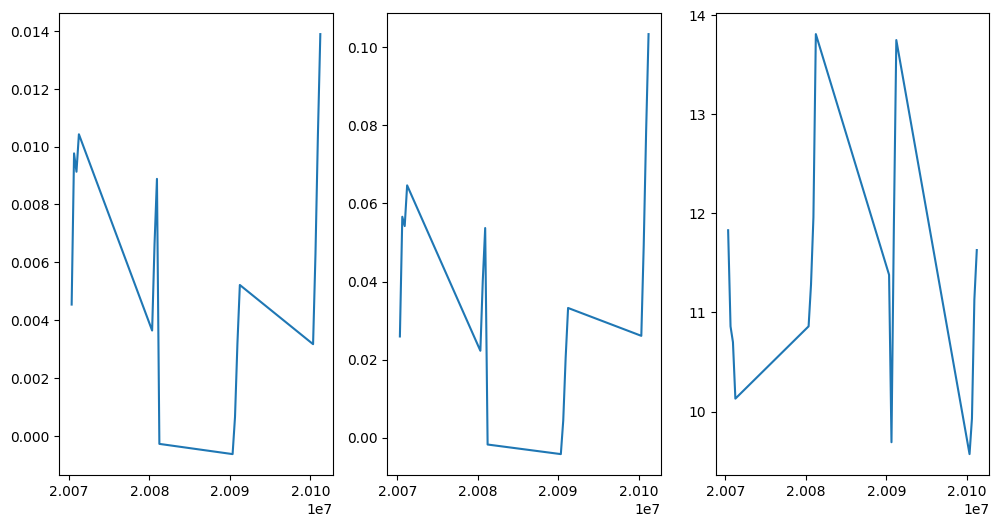

In [37]:
columns_we_want = ['return_on_assets','return_on_equity','non_performing_loan_ratio','REPORTING DATE (CC;YR;MO;DA): RSSD9999','TIER 1 RISK-BASED CAPITAL RATIO: BHCK7206']
values = ['return_on_assets','return_on_equity','non_performing_loan_ratio','TIER 1 RISK-BASED CAPITAL RATIO: BHCK7206']
vis_df = df[columns_we_want][df['ENTITY SHORT NAME: RSSD9010'] == 'CAPITAL ONE FC']

fig, axes = plt.subplots(ncols=3, figsize = (12,6))
axes[0].plot(vis_df['REPORTING DATE (CC;YR;MO;DA): RSSD9999'], vis_df['return_on_assets'])
axes[1].plot(vis_df['REPORTING DATE (CC;YR;MO;DA): RSSD9999'], vis_df['return_on_equity'])
axes[2].plot(vis_df['REPORTING DATE (CC;YR;MO;DA): RSSD9999'], vis_df['TIER 1 RISK-BASED CAPITAL RATIO: BHCK7206'])
plt.show()